<a href="https://colab.research.google.com/github/newgirlsly/makeit/blob/main/rain_aus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib


In [6]:
from google.colab import files
uploaded = files.upload()


Saving rain_aus.xlsx to rain_aus.xlsx


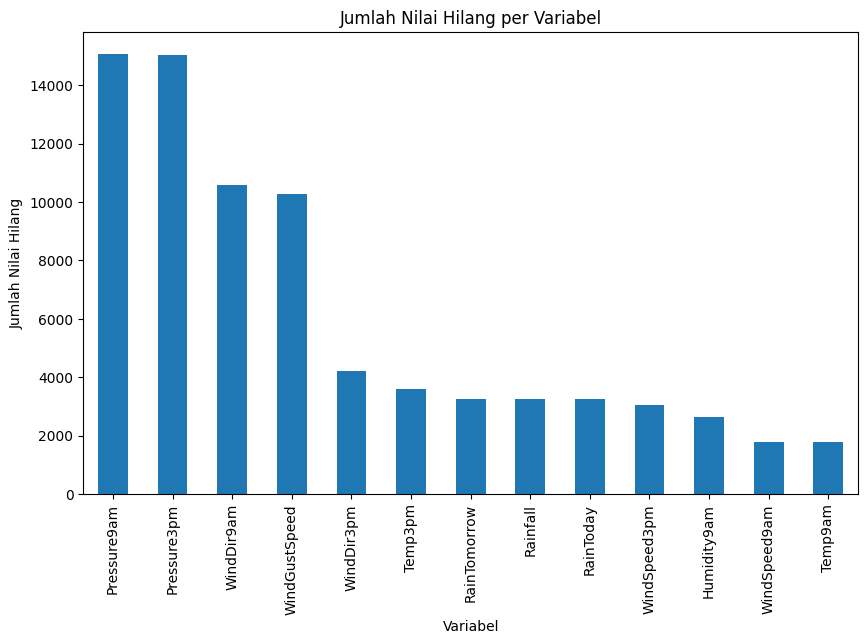

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file Excel yang diunggah
file_path = list(uploaded.keys())[0]
data = pd.read_excel(file_path)

# Temukan nilai yang hilang
missing_values = data.isna().sum()

# Buat grafik variabel dengan nilai hilang tertinggi
missing_values = missing_values[missing_values > 0]  # Hanya ambil variabel yang memiliki nilai hilang
missing_values.sort_values(ascending=False, inplace=True)  # Urutkan dari yang terbanyak

# Plot grafik
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Jumlah Nilai Hilang per Variabel')
plt.xlabel('Variabel')
plt.ylabel('Jumlah Nilai Hilang')
plt.show()


Saving rain_aus.xlsx to rain_aus (5).xlsx
Variabel dalam data:
['Location', 'Rainfall', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
Jumlah nilai hilang per variabel:
Location             0
Rainfall          3261
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


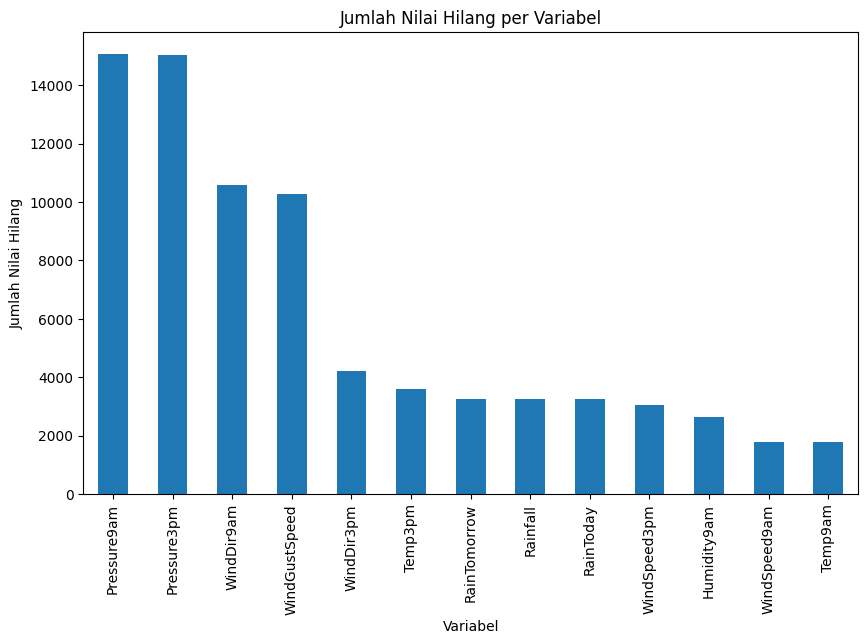

Jumlah nilai hilang setelah pengisian:
Location         0
Rainfall         0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Baca file Excel yang diunggah
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_excel(file_path)

# Tampilkan variabel dalam data
print("Variabel dalam data:")
print(data.columns.tolist())

# Temukan nilai yang hilang
missing_values = data.isna().sum()
print("Jumlah nilai hilang per variabel:")
print(missing_values)

# Buat grafik variabel dengan nilai hilang tertinggi
missing_values = missing_values[missing_values > 0]  # Hanya ambil variabel yang memiliki nilai hilang
missing_values.sort_values(ascending=False, inplace=True)  # Urutkan dari yang terbanyak

# Plot grafik
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Jumlah Nilai Hilang per Variabel')
plt.xlabel('Variabel')
plt.ylabel('Jumlah Nilai Hilang')
plt.show()

# Mengatasi missing value

# Untuk variabel numerik, kita menggunakan rata-rata (mean) untuk mengisi nilai yang hilang
imputer_num = SimpleImputer(strategy='mean')
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = imputer_num.fit_transform(data[numerical_columns])

# Untuk variabel kategorikal, kita menggunakan modus (nilai yang paling sering muncul) untuk mengisi nilai yang hilang
imputer_cat = SimpleImputer(strategy='most_frequent')
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = imputer_cat.fit_transform(data[categorical_columns])

# Verifikasi bahwa tidak ada lagi nilai yang hilang
missing_values_after = data.isna().sum()
print("Jumlah nilai hilang setelah pengisian:")
print(missing_values_after)

import pandas as pd

# Simpan data ke dalam file Excel baru
file_path_new = 'rain_aus_cleaned.xlsx'
data.to_excel(file_path_new, index=False)

# Unduh file menggunakan Google Colab
from google.colab import files
files.download(file_path_new)



Saving rain_aus_cleaned.xlsx to rain_aus_cleaned (1).xlsx


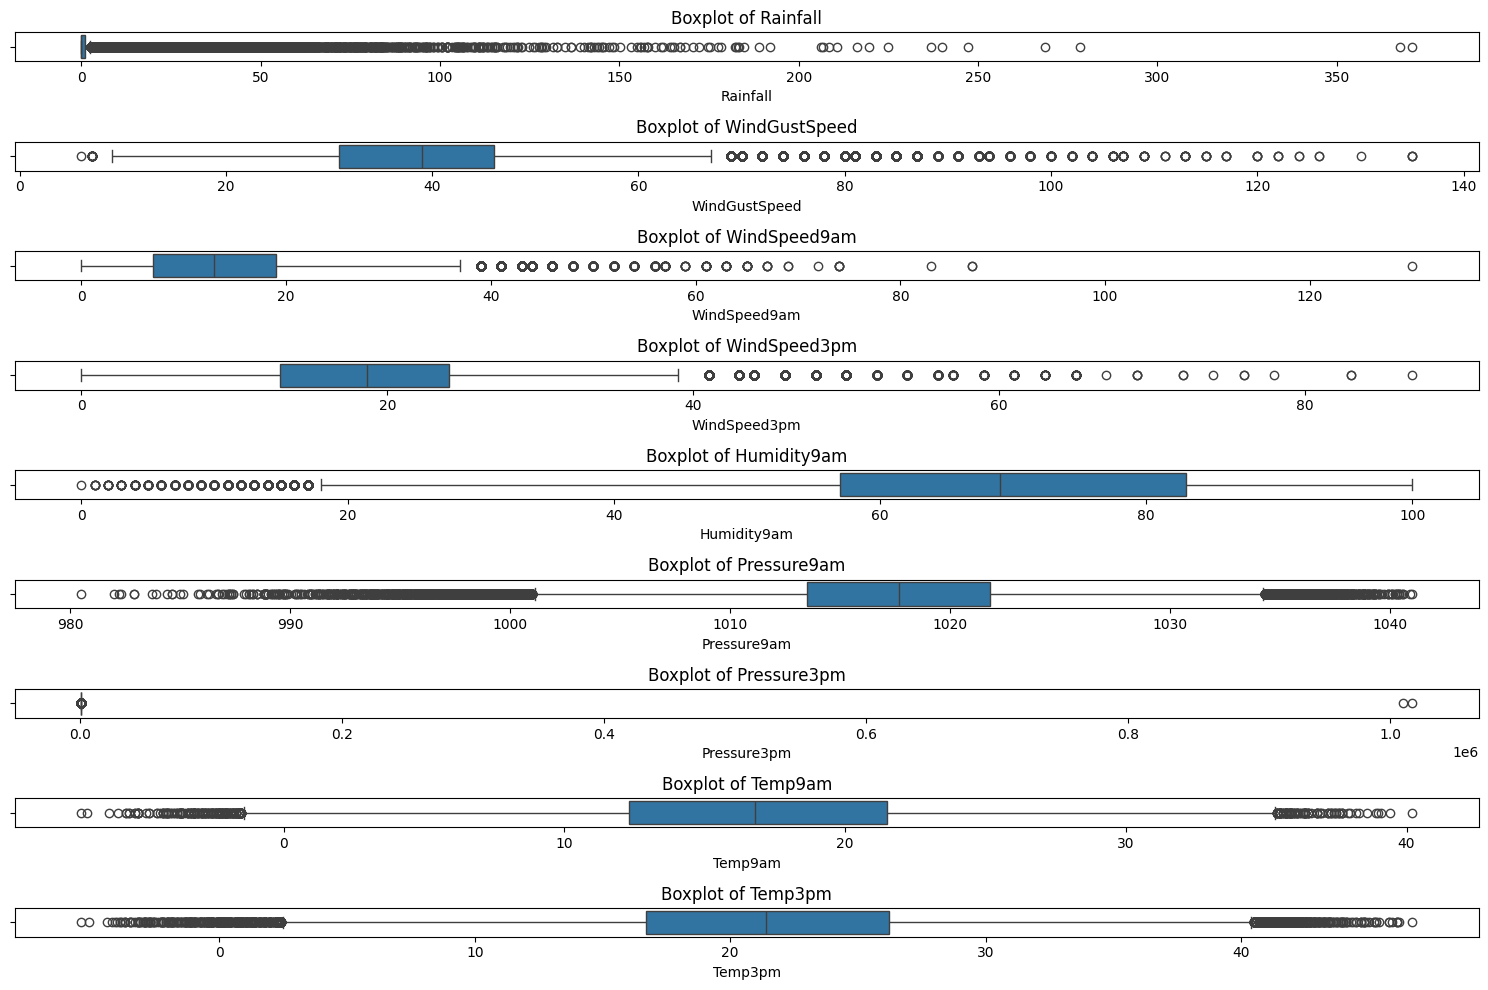

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file Excel yang diunggah
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_excel(file_path)

# Buat boxplot untuk setiap variabel numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


Saving rain_aus_cleaned.xlsx to rain_aus_cleaned (5).xlsx


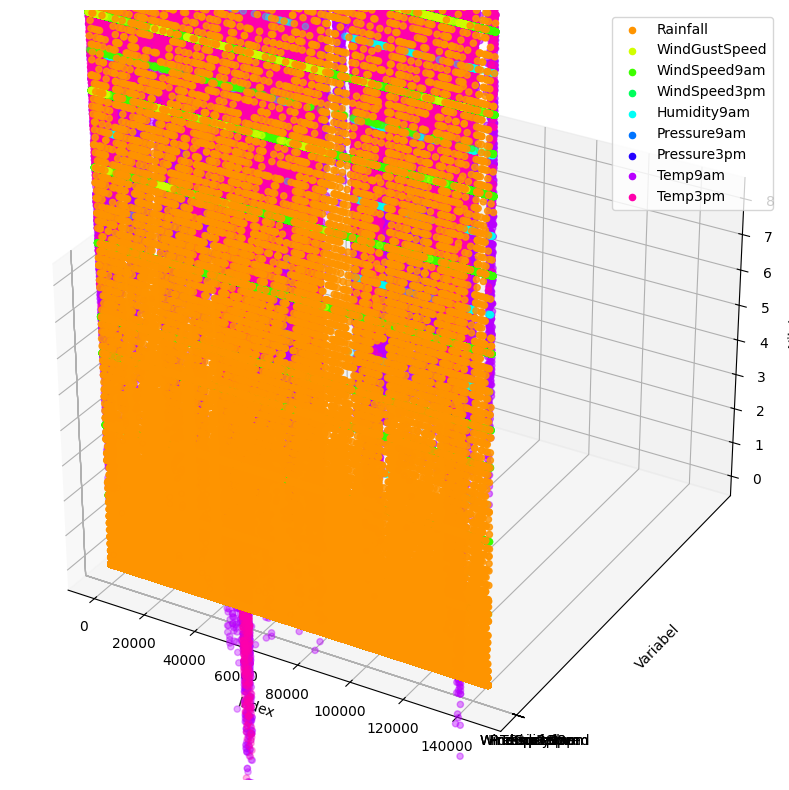

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Baca file Excel yang diunggah
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_excel(file_path)

# Pilih variabel numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Membuat scatter plot 3D dengan warna berbeda untuk setiap variabel
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors = sns.color_palette("hsv", len(numerical_columns))

for i, column in enumerate(numerical_columns):
    ax.scatter(data.index, data[column], zs=i, zdir='y', label=column, c=[colors[i]], depthshade=True)

ax.set_xlabel('Index')
ax.set_ylabel('Variabel')
ax.set_zlabel('Nilai')
ax.set_yticks(range(len(numerical_columns)))
ax.set_yticklabels(numerical_columns)
plt.legend()
plt.show()


Saving rain_aus_cleaned.xlsx to rain_aus_cleaned (7).xlsx


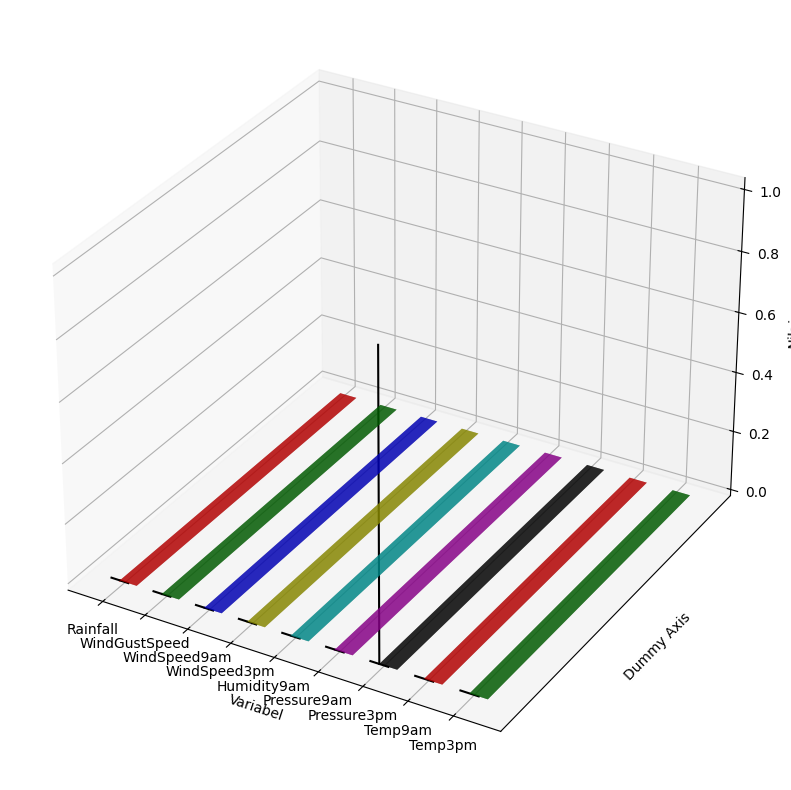

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Baca file Excel yang diunggah
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_excel(file_path)

# Pilih variabel numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Membuat boxplot 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

for i, column in enumerate(numerical_columns):
    data_column = data[column].dropna()
    q1 = np.percentile(data_column, 25)
    q3 = np.percentile(data_column, 75)
    median = np.median(data_column)
    min_val = data_column.min()
    max_val = data_column.max()

    # Plot garis vertikal untuk whiskers
    ax.plot([i, i], [1, 1], [min_val, q1], color=colors[i % len(colors)])
    ax.plot([i, i], [1, 1], [q3, max_val], color=colors[i % len(colors)])

    # Plot kotak interquartile
    ax.bar3d(i, 1, q1, 0.4, 1, q3-q1, color=colors[i % len(colors)], alpha=0.6)

    # Plot median
    ax.plot([i-0.2, i+0.2], [1, 1], [median, median], color='k')

ax.set_xlabel('Variabel')
ax.set_ylabel('Dummy Axis')
ax.set_zlabel('Nilai')
ax.set_yticks([])
ax.set_xticks(range(len(numerical_columns)))
ax.set_xticklabels(numerical_columns)
plt.show()


Saving rain_aus_cleaned (1).xlsx to rain_aus_cleaned (1) (2).xlsx


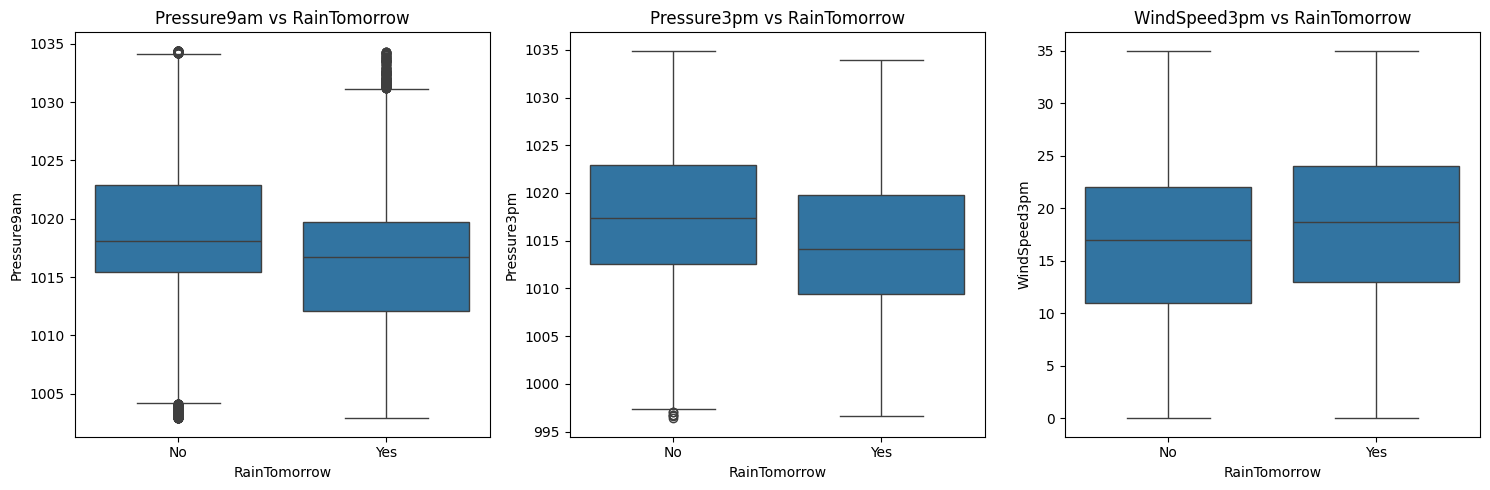

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file Excel yang diunggah
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.read_excel(file_path)

# Visualisasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='RainTomorrow', y='Pressure9am', data=data)
plt.title('Pressure9am vs RainTomorrow')

plt.subplot(1, 3, 2)
sns.boxplot(x='RainTomorrow', y='Pressure3pm', data=data)
plt.title('Pressure3pm vs RainTomorrow')

plt.subplot(1, 3, 3)
sns.boxplot(x='RainTomorrow', y='WindSpeed3pm', data=data)
plt.title('WindSpeed3pm vs RainTomorrow')

plt.tight_layout()
plt.show()


In [5]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Display Hidden Text</title>
    <style>
        #oi38 {
            color: black; /* Warna teks */
            background-color: white; /* Warna latar belakang */
            font-size: 24px; /* Ukuran font yang lebih besar */
            font-weight: bold; /* Membuat teks lebih tebal */
            opacity: 1; /* Pastikan elemen tidak transparan */
            visibility: visible; /* Pastikan elemen terlihat */
            display: inline; /* Pastikan elemen tidak disembunyikan */
            position: relative;
            z-index: 10; /* Pastikan elemen berada di lapisan atas */
        }
    </style>
</head>
<body>
    <span id="oi38">Informasi Tersembunyi</span> <!-- Teks asli yang ingin ditampilkan -->
</body>
</html>


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 18)